In [2]:
# importo librerías
import pandas as pd
import numpy as np
import os as os
import seaborn as sns
import matplotlib as mpl
import datetime as dt
import calendar # idem
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
!conda env list

# conda environments:
#
base                     /home/cesar/anaconda3
venv                  *  /home/cesar/anaconda3/envs/venv



In [4]:
os.environ['PYTHONPATH']

'/opt/spark-2.2.0-bin-hadoop2.7/python:/opt/spark-2.2.0-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip:home/cesar/anaconda3/bin'

In [5]:
os.getcwd()

'/home/cesar/universidad/7506/tp/2019_1C/tpdatos_v01/tpdatos2019/notebooks'

In [6]:
os.chdir('/home/cesar/universidad/7506/tp/2019_1C/data/')

In [7]:
%time
# Carga de archivos CSV
dfAuctions = pd.read_csv('auctions.csv', 
                 usecols=['date', 'device_id', 'platform','ref_type_id', 'source_id'], 
                 dtype={'platform':np.int8, 'ref_type_id':np.int8, 'source_id':np.int8})
dfAuctions.head(1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 65.6 µs


,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0


In [8]:
dfAuctions.head(10)

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0
5,2019-03-11 14:18:37.939485,1448534231953777480,1,1,0
6,2019-03-11 14:18:39.285471,7197160868095710320,1,1,0
7,2019-03-11 14:18:42.823963,160071254383181872,1,1,0
8,2019-03-11 14:18:43.587421,961481517958884390,1,1,0
9,2019-03-11 14:18:44.470248,2960551690927930513,1,1,0


In [8]:
#platform = android, ios
dfAuctions['platform'].unique()

array([1, 2])

In [9]:
dfAuctions['platform'].value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [10]:
#ref_type_id = internal id for the ref_type
dfAuctions['ref_type_id'].unique()

array([1, 7])

In [11]:
dfAuctions['ref_type_id'].value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

<font size="3">Se  ve que tanto <b>platform</b> como <b>ref_type_id</b> tiene la misma cantidad de valores distintos</font>

Se ve que tanto **platform** como **ref_type_id** tiene la misma cantidad de valores distintos

In [12]:
#source_id = source the auctions came from - fuente de la que proceden las subastas
dfAuctions['source_id'].unique()

array([0, 5, 6, 1, 2])

In [13]:
dfAuctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [14]:
dfAuctions.columns

Index(['date', 'device_id', 'platform', 'ref_type_id', 'source_id'], dtype='object')

In [15]:
dfAuctions.shape

(19571319, 5)

In [16]:
dfAuctions_platform = dfAuctions['platform'].value_counts().to_frame()

In [17]:
dfAuctions_platform

,platform
1,15541825
2,4029494


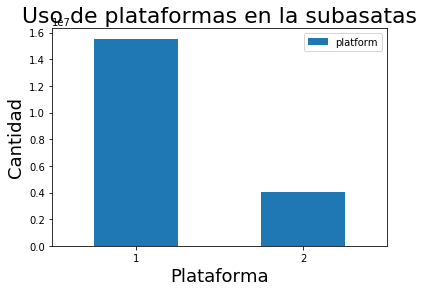

In [18]:
dfAuctions_platform.plot(rot=0,kind="bar")
plt.ylabel('Cantidad',fontsize=18);
plt.xlabel('Plataforma',fontsize=18);
plt.title( "Uso de plataformas en la subasatas",fontsize=22);


Podemos observar que hay un predominio de la plataforma 1 sobre la 2 en la participación en las subastas

In [19]:
1

1

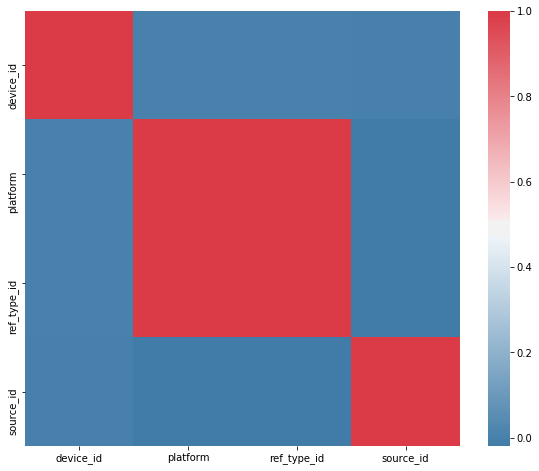

In [20]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = dfAuctions.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True), 
      square=True, ax=ax) 

> con esto confirmamos la relación que existe entre ref_type_id y platform.

In [21]:
dfAuctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 5 columns):
date           object
device_id      int64
platform       int8
ref_type_id    int8
source_id      int8
dtypes: int64(1), int8(3), object(1)
memory usage: 354.6+ MB


In [22]:
dfAuctions["date"] = pd.to_datetime(dfAuctions["date"],format='%Y-%m-%d %H:%M:%S', utc=True)


In [23]:
dfAuctions["date_single"] = pd.to_datetime(dfAuctions["date"])
dfAuctions["hour"] = dfAuctions["date"].dt.hour
dfAuctions["minute"] = dfAuctions["date"].dt.minute
dfAuctions["second"] = dfAuctions["date"].dt.second
dfAuctions["date_single"] =dfAuctions["date"].dt.date
dfAuctions["weekday"] = dfAuctions["date"].dt.weekday
dfAuctions["weekday_name"] = dfAuctions["date"].dt.weekday_name
dfAuctions['dayofyear'] = pd.to_datetime(dfAuctions["date_single"]).dt.dayofyear

In [24]:
dfAuctions

,date,device_id,platform,ref_type_id,source_id,date_single,hour,minute,second,weekday,weekday_name,dayofyear
0,2019-03-11 14:18:33.290763+00:00,6059599345986491085,1,1,0,2019-03-11,14,18,33,0,Monday,70
1,2019-03-11 14:18:34.440157+00:00,1115994996230693426,1,1,0,2019-03-11,14,18,34,0,Monday,70
2,2019-03-11 14:18:35.862360+00:00,7463856250762200923,1,1,0,2019-03-11,14,18,35,0,Monday,70
3,2019-03-11 14:18:36.167163+00:00,7829815350267792040,1,1,0,2019-03-11,14,18,36,0,Monday,70
4,2019-03-11 14:18:37.728590+00:00,1448534231953777480,1,1,0,2019-03-11,14,18,37,0,Monday,70
5,2019-03-11 14:18:37.939485+00:00,1448534231953777480,1,1,0,2019-03-11,14,18,37,0,Monday,70
6,2019-03-11 14:18:39.285471+00:00,7197160868095710320,1,1,0,2019-03-11,14,18,39,0,Monday,70
7,2019-03-11 14:18:42.823963+00:00,160071254383181872,1,1,0,2019-03-11,14,18,42,0,Monday,70
8,2019-03-11 14:18:43.587421+00:00,961481517958884390,1,1,0,2019-03-11,14,18,43,0,Monday,70
9,2019-03-11 14:18:44.470248+00:00,2960551690927930513,1,1,0,2019-03-11,14,18,44,0,Monday,70


In [25]:
dfAuctions["date_single"].value_counts()


2019-03-13    2938373
2019-03-12    2779910
2019-03-10    2637534
2019-03-11    2574916
2019-03-08    2303002
2019-03-09    2074552
2019-03-07    2047661
2019-03-05    1182401
2019-03-06    1032970
Name: date_single, dtype: int64

## ¿De que fechas obtenemos esta información?

In [26]:
dfAuctions.loc[:,'total'] = 1

In [27]:
dfAuctions.head(5)

,date,device_id,platform,ref_type_id,source_id,date_single,hour,minute,second,weekday,weekday_name,dayofyear,total
0,2019-03-11 14:18:33.290763+00:00,6059599345986491085,1,1,0,2019-03-11,14,18,33,0,Monday,70,1
1,2019-03-11 14:18:34.440157+00:00,1115994996230693426,1,1,0,2019-03-11,14,18,34,0,Monday,70,1
2,2019-03-11 14:18:35.862360+00:00,7463856250762200923,1,1,0,2019-03-11,14,18,35,0,Monday,70,1
3,2019-03-11 14:18:36.167163+00:00,7829815350267792040,1,1,0,2019-03-11,14,18,36,0,Monday,70,1
4,2019-03-11 14:18:37.728590+00:00,1448534231953777480,1,1,0,2019-03-11,14,18,37,0,Monday,70,1


In [28]:
dfAuctions_byDate = dfAuctions.groupby(['dayofyear','date_single'])['total'].count().to_frame()
dfAuctions_byDate

,,total
dayofyear,date_single,
64,2019-03-05,1182401
65,2019-03-06,1032970
66,2019-03-07,2047661
67,2019-03-08,2303002
68,2019-03-09,2074552
69,2019-03-10,2637534
70,2019-03-11,2574916
71,2019-03-12,2779910
72,2019-03-13,2938373


In [29]:
dfAuctions_byDate = dfAuctions_byDate.reset_index()
dfAuctions_byDate

,dayofyear,date_single,total
0,64,2019-03-05,1182401
1,65,2019-03-06,1032970
2,66,2019-03-07,2047661
3,67,2019-03-08,2303002
4,68,2019-03-09,2074552
5,69,2019-03-10,2637534
6,70,2019-03-11,2574916
7,71,2019-03-12,2779910
8,72,2019-03-13,2938373


In [30]:
dfAuctions_byDate = dfAuctions_byDate.set_index('date_single')
dfAuctions_byDate

,dayofyear,total
date_single,,
2019-03-05,64,1182401
2019-03-06,65,1032970
2019-03-07,66,2047661
2019-03-08,67,2303002
2019-03-09,68,2074552
2019-03-10,69,2637534
2019-03-11,70,2574916
2019-03-12,71,2779910
2019-03-13,72,2938373


In [31]:
#dfAuctions_byDate = dfAuctions_byDate.loc[:,'weekday_name']
dfAuctions_byDate = dfAuctions_byDate.rename(columns={'total': 'total_por_dia'})
dfAuctions_byDate

,dayofyear,total_por_dia
date_single,,
2019-03-05,64,1182401
2019-03-06,65,1032970
2019-03-07,66,2047661
2019-03-08,67,2303002
2019-03-09,68,2074552
2019-03-10,69,2637534
2019-03-11,70,2574916
2019-03-12,71,2779910
2019-03-13,72,2938373


> Observamos que el periodo de subastas del set de datos es del **5 de Marzo** al **13 de Marzo**.<br>


## Graficamos la cantidad de subastas por día durante el período

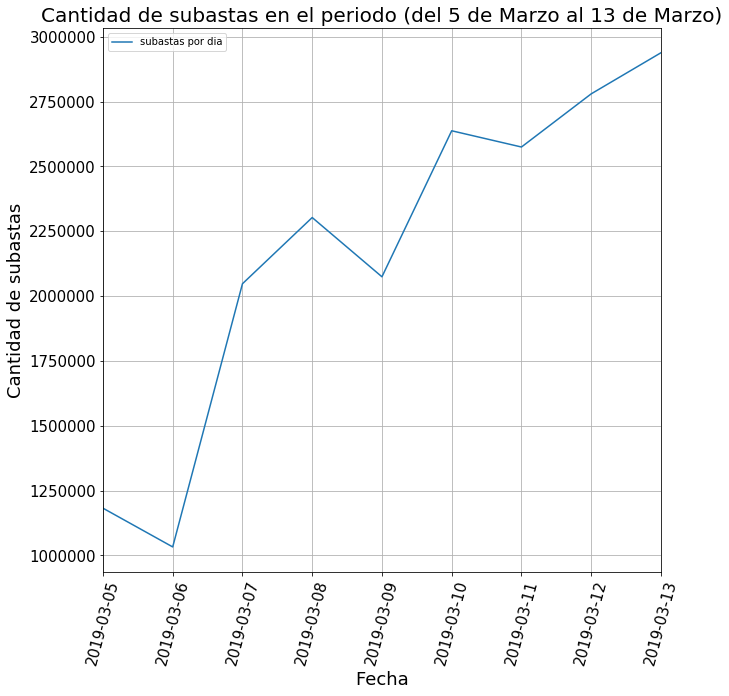

In [59]:
dfAuctions_byDate.loc[:,'total_por_dia'].plot(rot=75,figsize=(10,10),fontsize=15,x_compat=True,grid=True)
plt.title('Cantidad de subastas en el periodo (del 5 de Marzo al 13 de Marzo)',fontsize=20);
plt.ylabel('Cantidad de subastas',fontsize=18);
plt.xlabel('Fecha',fontsize=18);
plt.legend(['subastas por dia'], loc='upper left');

> Observamos que se proyecta sobre la cantidad de subastas una tendencia alcista. Pero el periodo de fechas sobre el cual se trabaja es de una semana para decidir si esta tendencia permanecera a lo largo del tiempo.

## ¿Cantidad de subastas por día y hora?

In [33]:
dfAuctionsByDateHour = dfAuctions.groupby(['dayofyear','date'])['weekday_name'].count().to_frame()
dfAuctionsByDateHour

weekday_name
dayofyear date                                          
64        2019-03-05 00:52:33.352526+00:00             1
          2019-03-05 00:52:40.105398+00:00             1
          2019-03-05 00:52:45.092232+00:00             1
          2019-03-05 00:52:46.102552+00:00             1
          2019-03-05 00:52:47.151640+00:00             1
          2019-03-05 00:52:48.815227+00:00             1
          2019-03-05 00:52:52.195001+00:00             1
          2019-03-05 00:52:52.311512+00:00             1
          2019-03-05 00:52:52.546848+00:00             1
          2019-03-05 00:52:52.870728+00:00             1
          2019-03-05 00:52:53.709922+00:00             1
          2019-03-05 00:52:54.070419+00:00             1
          2019-03-05 00:52:54.106856+00:00             1
          2019-03-05 00:52:54.782041+00:00             1
          2019-03-05 00:52:55.211641+00:00             1
          2019-03-05 00:52:56.025563+00:00             1
          2019-03-05 00:52:58.050826+00:00             1
          2019-03-05 00:52:58.391216+00:00             1
          2019-03-05 00:52:58.672906+00:00             1
          2019-03-05 00:52:58.774506+00:00             1
          2019-03-05 00:53:01.048264+00:00             1
          2019-03-05 00:53:01.409857+00:00             1
          2019-03-05 00:53:02.215364+00:00             1
          2019-03-05 00:53:02.414365+00:00             1
          2019-03-05 00:53:02.485569+00:00             1
          2019-03-05 00:53:03.109775+00:00             1
          2019-03-05 00:53:03.381676+00:00             1
          2019-03-05 00:53:03.494273+00:00             1
          2019-03-05 00:53:03.972807+00:00             1
          2019-03-05 00:53:04.487443+00:00             1
...                                                  ...
72        2019-03-13 23:59:59.572605+00:00             1
          2019-03-13 23:59:59.585266+00:00             1
          2019-03-13 23:59:59.587738+00:00             1
          2019-03-13 23:59:59.590172+00:00             1
          2019-03-13 23:59:59.649473+00:00             1
          2019-03-13 23:59:59.654288+00:00             1
          2019-03-13 23:59:59.663286+00:00             1
          2019-03-13 23:59:59.707176+00:00             1
          2019-03-13 23:59:59.709177+00:00             1
          2019-03-13 23:59:59.735810+00:00             1
          2019-03-13 23:59:59.754930+00:00             1
          2019-03-13 23:59:59.780781+00:00             1
          2019-03-13 23:59:59.784277+00:00             1
          2019-03-13 23:59:59.787514+00:00             1
          2019-03-13 23:59:59.794733+00:00             1
          2019-03-13 23:59:59.810414+00:00             1
          2019-03-13 23:59:59.817044+00:00             1
          2019-03-13 23:59:59.838902+00:00             1
          2019-03-13 23:59:59.859763+00:00             1
          2019-03-13 23:59:59.864496+00:00             1
          2019-03-13 23:59:59.896480+00:00             1
          2019-03-13 23:59:59.903910+00:00             1
          2019-03-13 23:59:59.916004+00:00             1
          2019-03-13 23:59:59.933993+00:00             1
          2019-03-13 23:59:59.948093+00:00             1
          2019-03-13 23:59:59.949856+00:00             1
          2019-03-13 23:59:59.960218+00:00             1
          2019-03-13 23:59:59.985544+00:00             1
          2019-03-13 23:59:59.994631+00:00             1
          2019-03-13 23:59:59.997032+00:00             1

[19570963 rows x 1 columns]

In [34]:
dfAuctionsByDateHour2 = dfAuctions.groupby(['dayofyear','date_single','hour','minute'])['total'].count().to_frame()
dfAuctionsByDateHour2.head(10)

total
dayofyear date_single hour minute       
64        2019-03-05  0    52         20
                           53        600
                           54       1659
                           55       2274
                           56       2394
                           57       2532
                           58       2673
                           59       2707
                      1    0        2455
                           1        2594

In [42]:
dfAuctionsByDateHour2 = dfAuctionsByDateHour2.reset_index()

dfAuctionsByDateHour2['date_single'] = pd.to_datetime(dfAuctionsByDateHour2['date_single'],format='%Y-%m-%d', utc=False)
dfAuctionsByDateHour2.head(10)


,index,dayofyear,date_single,hour,minute,total
0,0,64,2019-03-05,0,52,20
1,1,64,2019-03-05,0,53,600
2,2,64,2019-03-05,0,54,1659
3,3,64,2019-03-05,0,55,2274
4,4,64,2019-03-05,0,56,2394
5,5,64,2019-03-05,0,57,2532
6,6,64,2019-03-05,0,58,2673
7,7,64,2019-03-05,0,59,2707
8,8,64,2019-03-05,1,0,2455
9,9,64,2019-03-05,1,1,2594


In [43]:
dfAuctionsByDateHour2.columns

Index(['index', 'dayofyear', 'date_single', 'hour', 'minute', 'total'], dtype='object')

In [44]:
dfAuctionsByDateHour2 = dfAuctionsByDateHour2.set_index(['date_single','index'])
dfAuctionsByDateHour2.head(10)

dayofyear  hour  minute  total
date_single index                                
2019-03-05  0             64     0      52     20
            1             64     0      53    600
            2             64     0      54   1659
            3             64     0      55   2274
            4             64     0      56   2394
            5             64     0      57   2532
            6             64     0      58   2673
            7             64     0      59   2707
            8             64     1       0   2455
            9             64     1       1   2594

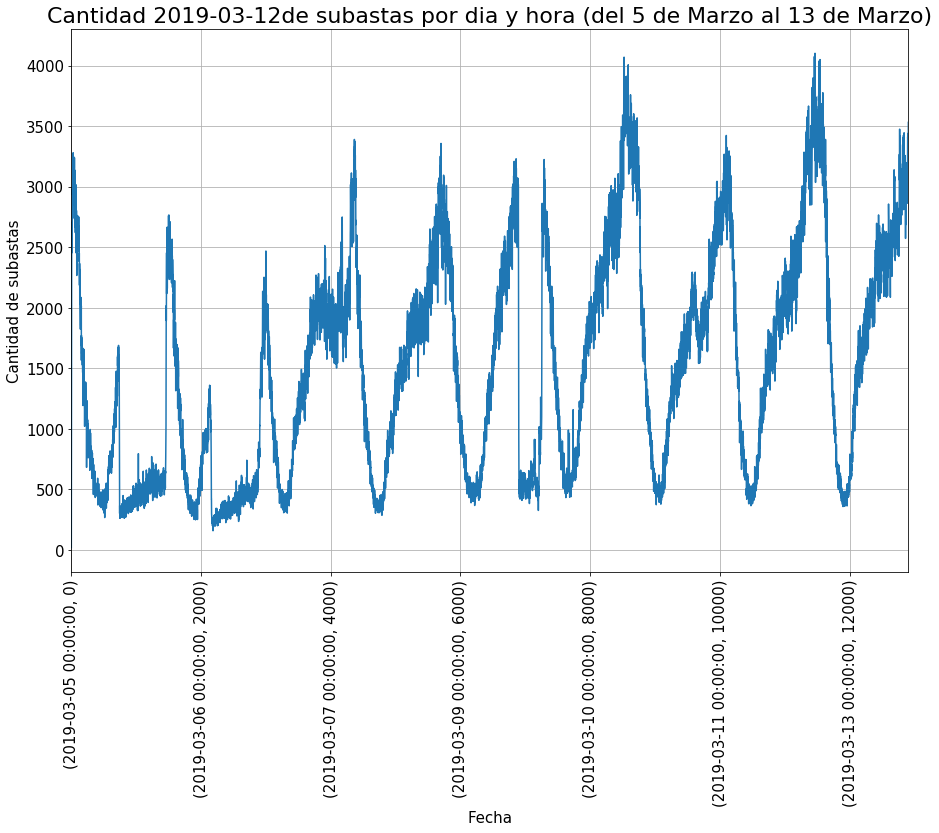

In [46]:

start, end = '2019-03-05','2019-03-13'
dfAuctionsByDateHour2.loc[start:end,'total'].plot(rot=90,figsize=(15,10),fontsize=15,x_compat=False,grid=True)
plt.title('Cantidad 2019-03-12de subastas por dia y hora (del 5 de Marzo al 13 de Marzo)',fontsize=22);
plt.ylabel('Cantidad de subastas',fontsize=15);
plt.xlabel('Fecha',fontsize=15);


In [54]:
dfAuctionsByHour3 = dfAuctions.groupby(['hour'])['total'].count().to_frame()
#dfAuctionsByDateHour3 = dfAuctionsByDateHour3.rename(columns = {'weekday_name':'total'}, inplace = True)
dfAuctionsByHour3



,total
hour,
0,1005716
1,1371091
2,1388464
3,1027541
4,716194
5,487243
6,325730
7,245109
8,247915


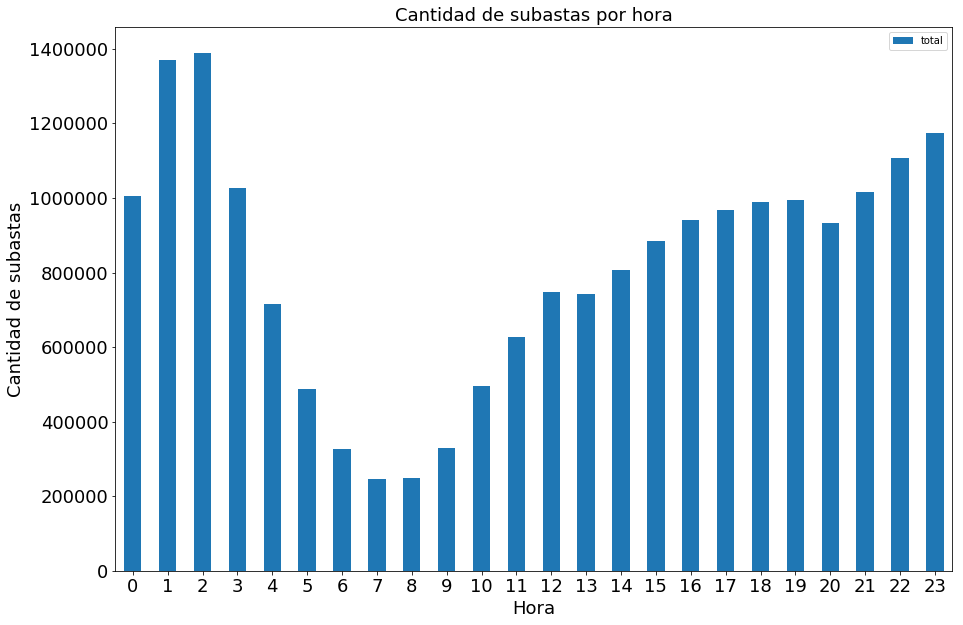

In [60]:
dfAuctionsByHour3.plot(kind='bar',rot=0,figsize=(15,10),fontsize=18)
#index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

plt.title('Cantidad de subastas por hora',fontsize=18);
plt.ylabel('Cantidad de subastas',fontsize=18);
plt.xlabel('Hora',fontsize=18);
#plt.xticks(list(range(len(index))), dfAuctionsByHour3.index, fontsize=18)
plt.show()

In [54]:
#dfAuctionsByDateHour3(dfAuctionsByDateHour3['dayofyear'] == '71')
dayofyears = [71]
dfAuctionsByDateHour3[dfAuctionsByDateHour3.dayofyear.isin(dayofyears)]

,index,dayofyear,date_single,hour,minute,weekday_name
10028,10028,71,2019-03-12,0,0,2891
10029,10029,71,2019-03-12,0,1,2519
10030,10030,71,2019-03-12,0,2,2672
10031,10031,71,2019-03-12,0,3,2634
10032,10032,71,2019-03-12,0,4,2657
10033,10033,71,2019-03-12,0,5,2694
10034,10034,71,2019-03-12,0,6,2533
10035,10035,71,2019-03-12,0,7,2656
10036,10036,71,2019-03-12,0,8,2709
10037,10037,71,2019-03-12,0,9,2713


In [59]:
dfAuctionsByDateHour3.dayofyear.unique()

array([64, 65, 66, 67, 68, 69, 70, 71, 72])

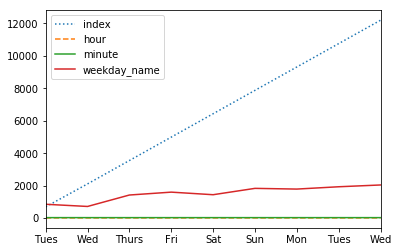

In [63]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
by_weekday = dfAuctionsByDateHour3.groupby(dfAuctionsByDateHour3.dayofyear).mean()
by_weekday.index = ['Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun','Mon','Tues', 'Wed' ]
by_weekday.plot(style=[':', '--', '-']);

In [47]:
dfAuctionsByDateHour3.columns

Index(['index', 'dayofyear', 'date_single', 'hour', 'minute', 'weekday_name'], dtype='object')

In [44]:
dfAuctionsByDateHour3 = dfAuctionsByDateHour3.set_index(['date_single','hour','minute'])
dfAuctionsByDateHour3

index  dayofyear  weekday_name
date_single hour minute                                
2019-03-05  0    52          0         64            20
                 53          1         64           600
                 54          2         64          1659
                 55          3         64          2274
                 56          4         64          2394
                 57          5         64          2532
                 58          6         64          2673
                 59          7         64          2707
            1    0           8         64          2455
                 1           9         64          2594
                 2          10         64          2482
                 3          11         64          2694
                 4          12         64          2564
                 5          13         64          2618
                 6          14         64          2656
                 7          15         64          2714
                 8          16         64          2954
                 9          17         64          2982
                 10         18         64          2932
                 11         19         64          2986
                 12         20         64          2866
                 13         21         64          2739
                 14         22         64          2921
                 15         23         64          3058
                 16         24         64          3015
                 17         25         64          2981
                 18         26         64          2964
                 19         27         64          2988
                 20         28         64          3282
                 21         29         64          3044
...                        ...        ...           ...
2019-03-13  23   30      12878         72          3119
                 31      12879         72          3064
                 32      12880         72          2872
                 33      12881         72          3112
                 34      12882         72          2863
                 35      12883         72          3107
                 36      12884         72          3167
                 37      12885         72          3172
                 38      12886         72          3007
                 39      12887         72          3201
                 40      12888         72          2943
                 41      12889         72          2868
                 42      12890         72          3089
                 43      12891         72          2892
                 44      12892         72          3165
                 45      12893         72          3168
                 46      12894         72          3122
                 47      12895         72          3175
                 48      12896         72          3348
                 49      12897         72          3413
                 50      12898         72          3405
                 51      12899         72          3144
                 52      12900         72          3158
                 53      12901         72          3266
                 54      12902         72          3442
                 55      12903         72          3143
                 56      12904         72          3313
                 57      12905         72          3058
                 58      12906         72          3236
                 59      12907         72          3533

[12908 rows x 3 columns]

In [38]:
#dfAuctionsByDateHour3.loc[:,'weekday_name']
dfAuctionsByDateHour3 = dfAuctionsByDateHour3.loc[:,'weekday_name']
dfAuctionsByDateHour3

date_single  hour  minute
2019-03-05   0     52          20
                   53         600
                   54        1659
                   55        2274
                   56        2394
                   57        2532
                   58        2673
                   59        2707
             1     0         2455
                   1         2594
                   2         2482
                   3         2694
                   4         2564
                   5         2618
                   6         2656
                   7         2714
                   8         2954
                   9         2982
                   10        2932
                   11        2986
                   12        2866
                   13        2739
                   14        2921
                   15        3058
                   16        3015
                   17        2981
                   18        2964
                   19        2988
                   20 

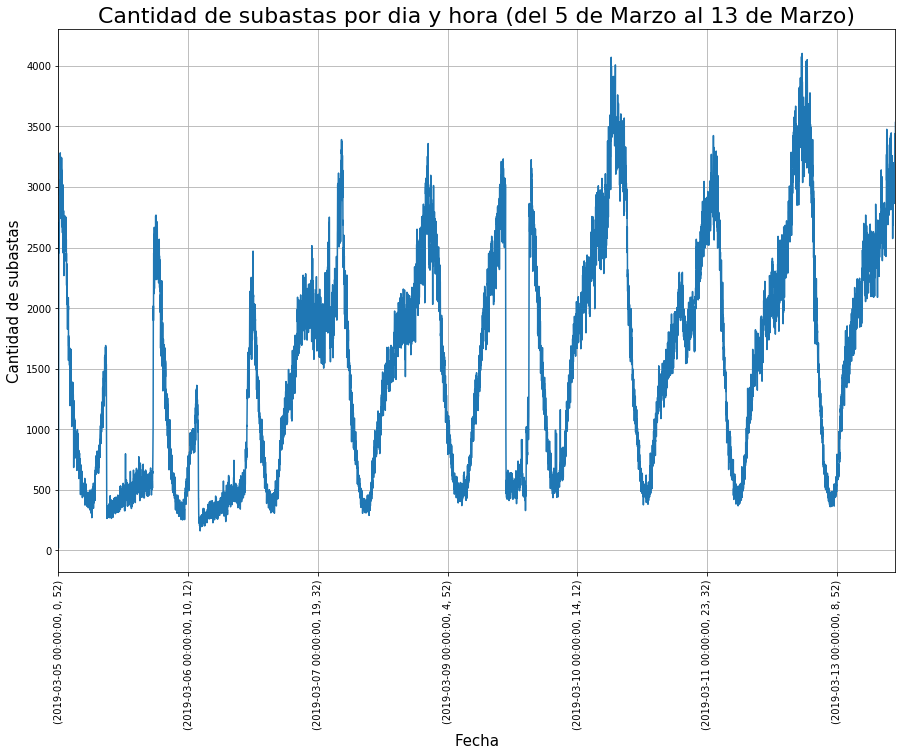

In [39]:
dfAuctionsByDateHour3.plot(rot=90,figsize=(15,10),fontsize=10,x_compat=True,grid=True)
plt.title('Cantidad de subastas por dia y hora (del 5 de Marzo al 13 de Marzo)',fontsize=22);
plt.ylabel('Cantidad de subastas',fontsize=15);
#index = ["",1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

plt.xlabel('Fecha',fontsize=15);
#plt.xticks(list(range(len(index))), dfAuctionsByDateHour3.index, fontsize=18)

#ax.xaxis.set_major_locator(dfAuctionsByDateHour3.WeekdayLocator())


In [47]:
#dfAuctionsByDateHour3[('date_single' == '2019-03-12')]
#dfAuctionsByDateHour3[dfAuctionsByDateHour3.date_single.dt.strftime('%D %H:%M:%S').between('12 00:00:00','12 24:00:00')]
dfAuctionsByDateHour3


date_single  hour  minute
2019-03-05   0     52          20
                   53         600
                   54        1659
                   55        2274
                   56        2394
                   57        2532
                   58        2673
                   59        2707
             1     0         2455
                   1         2594
                   2         2482
                   3         2694
                   4         2564
                   5         2618
                   6         2656
                   7         2714
                   8         2954
                   9         2982
                   10        2932
                   11        2986
                   12        2866
                   13        2739
                   14        2921
                   15        3058
                   16        3015
                   17        2981
                   18        2964
                   19        2988
                   20 

In [74]:
dfAuctionsByDay4 = dfAuctions.groupby(['weekday_name','weekday'])['total'].count().to_frame()
dfAuctionsByDay4 = dfAuctionsByDay4.reset_index()
dfAuctionsByDay4 = dfAuctionsByDay4.set_index('weekday_name').sort_values(['weekday'])
dfAuctionsByDay4.head(10)


,weekday,total
weekday_name,,
Monday,0,2574916
Tuesday,1,3962311
Wednesday,2,3971343
Thursday,3,2047661
Friday,4,2303002
Saturday,5,2074552
Sunday,6,2637534


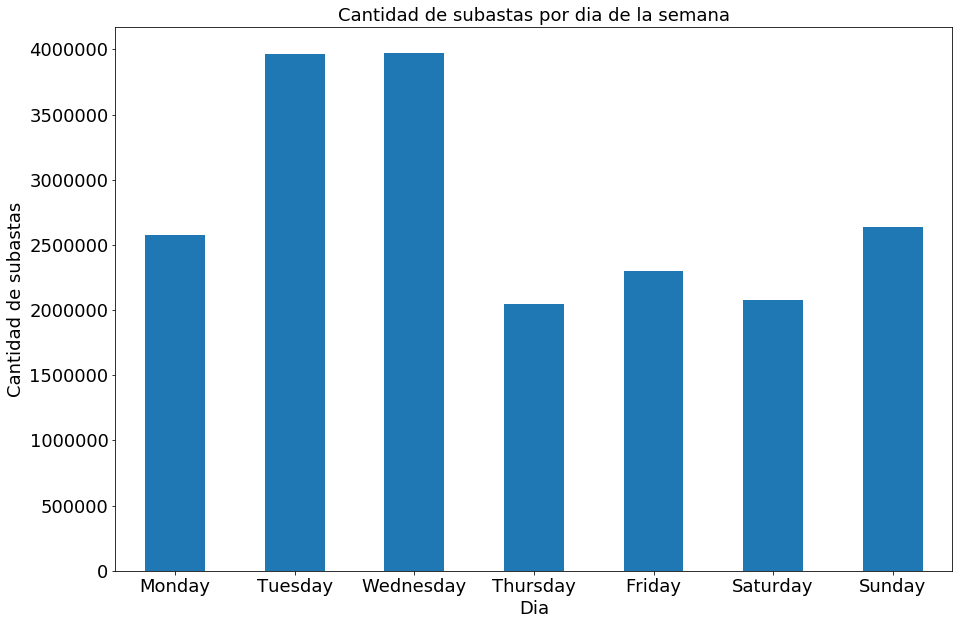

In [76]:
dfAuctionsByDay4.loc[:,'total'].plot(kind='bar',rot=0,figsize=(15,10),fontsize=18)
#index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

plt.title('Cantidad de subastas por dia de la semana',fontsize=18);
plt.ylabel('Cantidad de subastas',fontsize=18);
plt.xlabel('Dia',fontsize=18);
#plt.xticks(list(range(len(index))), dfAuctionsByHour3.index, fontsize=18)
plt.show()

In [56]:
dfAuctionsByDateHour4[dfAuctionsByDateHour4['date_single'].dt.date.astype(str) == '2019-03-12']


,date_single,hour,minute,weekday_name
10028,2019-03-12,0,0,2891
10029,2019-03-12,0,1,2519
10030,2019-03-12,0,2,2672
10031,2019-03-12,0,3,2634
10032,2019-03-12,0,4,2657
10033,2019-03-12,0,5,2694
10034,2019-03-12,0,6,2533
10035,2019-03-12,0,7,2656
10036,2019-03-12,0,8,2709
10037,2019-03-12,0,9,2713


## TOP 5 - de Dispositivos que participan de la subastas.

In [11]:
# extracting greatest 5 
device_id_Top5 = dfAuctions.groupby("device_id")["device_id"].count().nlargest(5)

# display 
device_id_Top5

device_id
633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
Name: device_id, dtype: int64

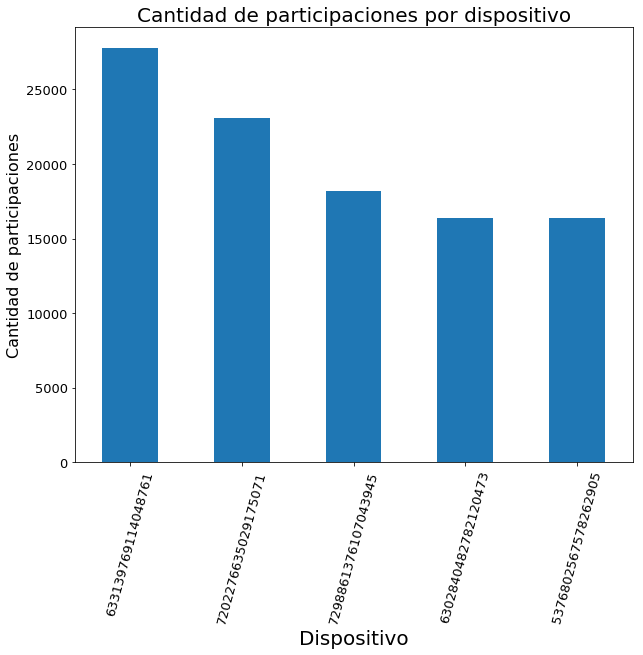

In [10]:

device_id_Top5
device_id_Top5.plot(kind='bar', rot=75, figsize=(10,8) ,fontsize=13);

plt.title('Cantidad de participaciones por dispositivo', fontsize=20);
plt.ylabel('Cantidad de participaciones', fontsize=16);
plt.xlabel('Dispositivo', fontsize=20);